In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pickleslicer

plt.rcdefaults()
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'

Load the data file containing the sequences, compiler results, and calculated data.

> _Note: 8-qubit data is omitted from this repository due to file size limitations._

In [2]:
class PlotData:
    def __init__(self):
        self.parametric_xdata = [0.0]
        self.parametric_ydata = [0.0]
        self.wall_xdata = [0.0]
        self.wall_ydata = [0.0]

ideal_sequences = {}
trotter_sequences = {}
qdrift_sequences = {}
stoq_compiler_results = {}
trotter_plot_data = {}
qdrift_plot_data = {}
stoq_plot_data = {}
for n in [2, 3, 5]:
    load_data = pickleslicer.load(f'../fig10/data/hamiltonian_compilation_{n}q.pickle')
    ideal_sequences[n] = load_data["ideal_sequence"]
    trotter_sequences[n] = load_data["trotter_sequence"]
    qdrift_sequences[n] = load_data["qdrift_sequence"]
    stoq_compiler_results[n] = load_data["qmcmc_compiler_results"]
    trotter_plot_data[n] = load_data["trotter_plot_data"]
    qdrift_plot_data[n] = load_data["qdrift_plot_data"]
    stoq_plot_data[n] = load_data["qmcmc_plot_data"]

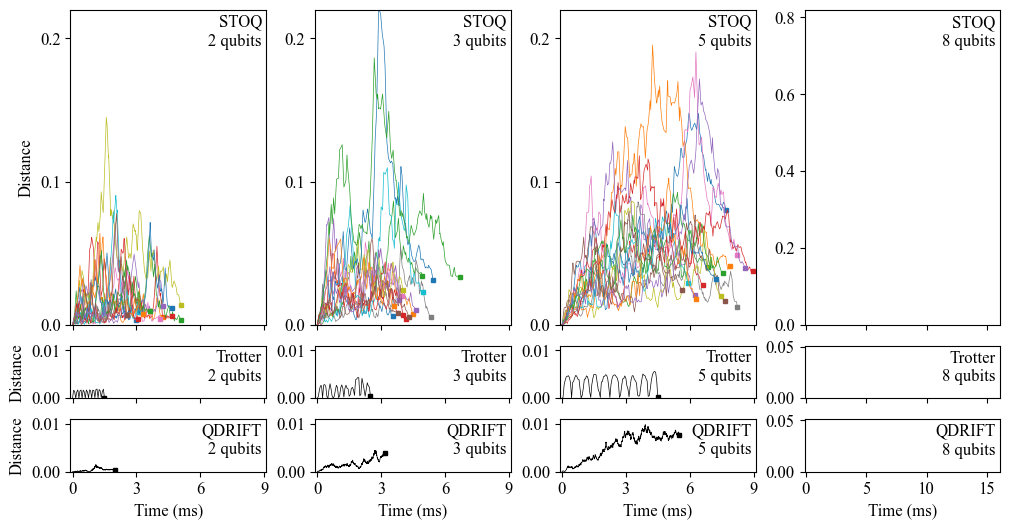

In [3]:
fig, (ax_stoq, ax_trotter, ax_qdrift) = plt.subplots(
    3, 4, gridspec_kw={'height_ratios': [6, 1, 1]}, figsize=((12,6)), sharex=False, sharey=False)
plt.subplots_adjust(wspace=0.25, hspace=0.15)

marker = 's'
markersize = 3

for i, n in enumerate([2, 3, 5, 8]):
    ax0 = ax_stoq[i]
    ax1 = ax_trotter[i]
    ax2 = ax_qdrift[i]

    if n in stoq_plot_data:
        for plot_data in stoq_plot_data[n]:
            color = next(ax0._get_lines.prop_cycler)['color']
            ax0.plot(plot_data.wall_xdata, plot_data.wall_ydata, linestyle='-', linewidth=0.5, color=color)
            ax0.plot(plot_data.wall_xdata[-1], plot_data.wall_ydata[-1], marker=marker, markersize=markersize, color=color)

        color = 'black'
        ax1.plot(trotter_plot_data[n].wall_xdata, trotter_plot_data[n].wall_ydata, linewidth=0.5, color=color)
        ax1.plot(trotter_plot_data[n].wall_xdata[-1], trotter_plot_data[n].wall_ydata[-1], marker=marker, markersize=markersize, color=color)

        ax2.plot(qdrift_plot_data[n].wall_xdata, qdrift_plot_data[n].wall_ydata, linewidth=0.5, color=color)
        ax2.plot(qdrift_plot_data[n].wall_xdata[-1], qdrift_plot_data[n].wall_ydata[-1], marker=marker, markersize=markersize, color=color)

    for ax in [ax0, ax1, ax2]:
        ax.tick_params(axis='both', labelsize=12)
        ax.set_yscale('linear')
        if n == 8:
            ax.set_xlim(-0.1, 16.1)
            ax.set_xticks([0, 5, 10, 15])
            ax.set_xticklabels([])
            ax.set_ylim(0, 0.051)
            ax.set_yticks([0, 0.05])
            ax.set_yticklabels(['0.00', '0.05'])
        else:
            ax.set_xlim(-0.1, 9.1)
            ax.set_xticks([0, 3, 6, 9])
            ax.set_xticklabels([])
            ax.set_ylim(0, 0.011)
            ax.set_yticks([0, 0.01])
            ax.set_yticklabels(['0.00', '0.01'])  
        if i == 0:
            ax.set_ylabel('Distance', fontsize=12)

    ax0.set_yscale('linear')
    if n == 8:
        ax0.set_ylim(0, 0.82)
        ax0.set_yticks([0, 0.2, 0.4, 0.6, 0.8])
        ax0.set_yticklabels(['0.0', '0.2', '0.4', '0.6', '0.8'])
        ax2.set_xticklabels(['0', '5', '10', '15'])
    else:
        ax0.set_ylim(0, 0.22)
        ax0.set_yticks([0, 0.1, 0.2])
        ax0.set_yticklabels(['0.0', '0.1', '0.2'])   
        ax2.set_xticklabels(['0', '3', '6', '9'])     

    ax2.set_xlabel('Time (ms)', fontsize=12)

    ax0.text(x=15.7 if n == 8 else 8.9, y=0.725 if n == 8 else 0.195, s=f'STOQ\n{n} qubits', fontsize=12, horizontalalignment='right')
    ax1.text(x=15.7 if n == 8 else 8.9, y=0.017 if n == 8 else 0.0037, s=f'Trotter\n{n} qubits', fontsize=12, horizontalalignment='right')
    ax2.text(x=15.7 if n == 8 else 8.9, y=0.017 if n == 8 else 0.0037, s=f'QDRIFT\n{n} qubits', fontsize=12, horizontalalignment='right')

fig.savefig("fig11.pdf", bbox_inches='tight')

plt.show()